In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)


In [4]:
snp_data_path = '../data/raw/FinalReport.csv'
str_train_path = '../data/raw/STR_train.csv'
str_test_path = '../data/raw/STR_test.csv'


In [5]:
snp_data = pd.read_csv(snp_data_path, sep=';')
str_train = pd.read_csv(str_train_path, sep=';')
str_test = pd.read_csv(str_test_path, sep=';')

In [6]:
print("SNP Data:")
display(snp_data.head())

print("STR Train Data:")
display(str_train.head())

print("STR Test Data:")
display(str_test.head())

SNP Data:


animal_id           SNP Name Allele1 - Forward Allele2 - Forward  \
0  682099250  ARS-BFGL-BAC-1020                 A                 G   
1  682098753  ARS-BFGL-BAC-1020                 A                 G   
2  682096766  ARS-BFGL-BAC-1020                 G                 G   
3  682097933  ARS-BFGL-BAC-1020                 A                 G   
4  682099052  ARS-BFGL-BAC-1020                 G                 G   

  Allele1 - AB Allele2 - AB  
0            A            B  
1            A            B  
2            B            B  
3            A            B  
4            B            B

STR Train Data:


animal_id STR Name  Allele1  Allele2
0  312278097   BM1818      262      266
1  312278097   BM1818      262      266
2  312278097   BM1824      182      188
3  312278097   BM1824      182      188
4  312278097   BM2113      125      125

STR Test Data:


animal_id STR Name  Allele1  Allele2
0    2848780  TGLA227      NaN      NaN
1    2848780  TGLA227      NaN      NaN
2    2848780  TGLA126      NaN      NaN
3    2848780  TGLA126      NaN      NaN
4    2848780  TGLA122      NaN      NaN

In [7]:
print(f"SNP data shape: {snp_data.shape}")
print(f"STR train data shape: {str_train.shape}")
print(f"STR test data shape: {str_test.shape}")

SNP data shape: (26272455, 6)
STR train data shape: (111628, 4)
STR test data shape: (28355, 4)


In [8]:
print("Пропущенные значения в SNP данных:")
display(snp_data.isnull().sum())

print("Пропущенные значения в STR обучающих данных:")
display(str_train.isnull().sum())

print("Пропущенные значения в STR тестовых данных:")
display(str_test.isnull().sum())

Пропущенные значения в SNP данных:


animal_id            0
SNP Name             0
Allele1 - Forward    0
Allele2 - Forward    0
Allele1 - AB         0
Allele2 - AB         0
dtype: int64

Пропущенные значения в STR обучающих данных:


animal_id    0
STR Name     0
Allele1      0
Allele2      0
dtype: int64

Пропущенные значения в STR тестовых данных:


animal_id        0
STR Name         0
Allele1      28355
Allele2      28355
dtype: int64

In [9]:
# Проверка уникальных значений animal_id в обеих таблицах
print(f"\nUnique animal_ids in SNP data: {snp_data['animal_id'].nunique()}")
print(f"Unique animal_ids in STR data: {str_train['animal_id'].nunique()}")

# Проверка пересечения по animal_id
common_ids = np.intersect1d(snp_data['animal_id'].unique(), str_train['animal_id'].unique())
print(f"\nNumber of common animal_ids between SNP and STR data: {len(common_ids)}")



Unique animal_ids in SNP data: 8442
Unique animal_ids in STR data: 6752

Number of common animal_ids between SNP and STR data: 6752


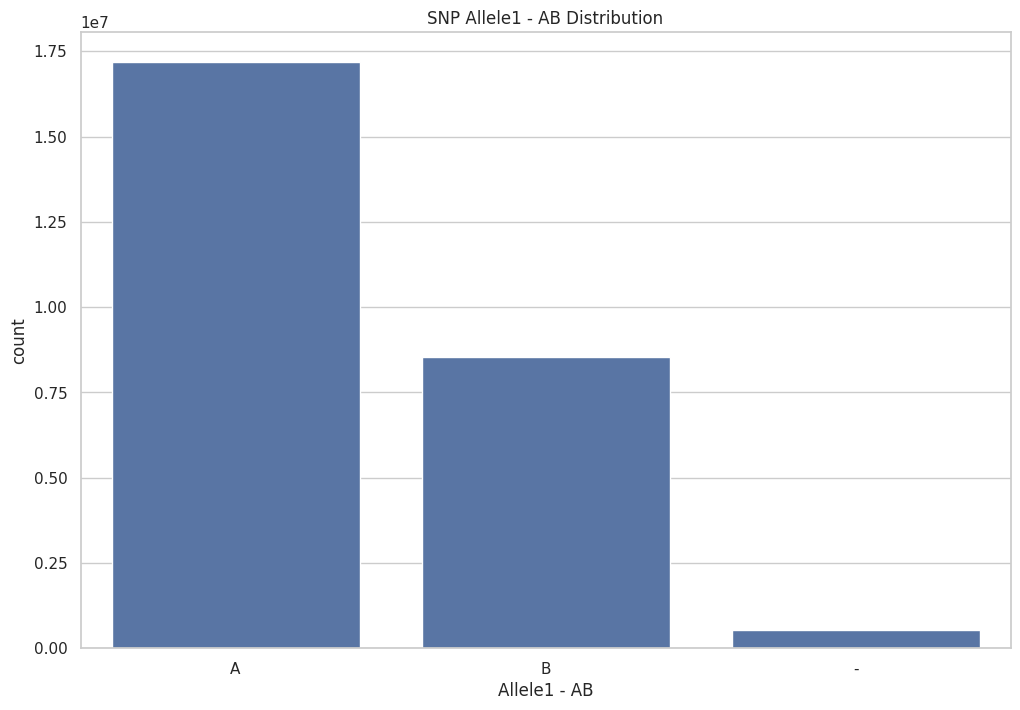

In [10]:
sns.countplot(data=snp_data, x='Allele1 - AB')
plt.title('SNP Allele1 - AB Distribution')
plt.show()


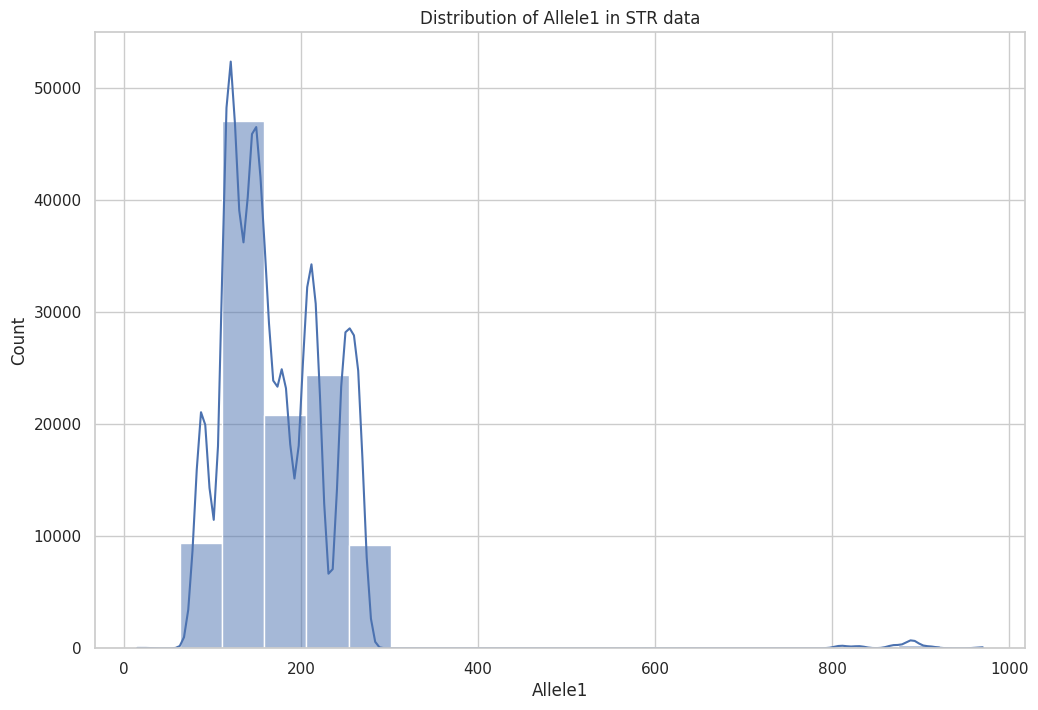

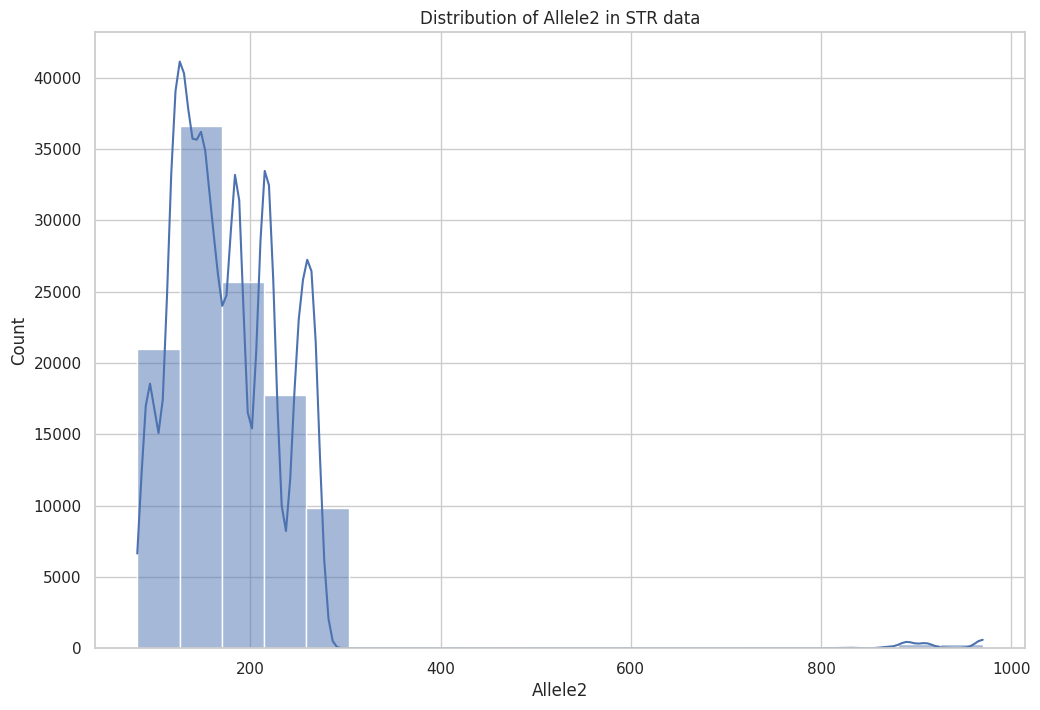

In [11]:
allele_cols = ['Allele1', 'Allele2']
for col in allele_cols:
    sns.histplot(str_train[col].dropna(), bins=20, kde=True)
    plt.title(f'Distribution of {col} in STR data')
    plt.show()

In [12]:
# Проверка количества SNP маркеров
snp_markers = snp_data['SNP Name'].nunique()
print(f"\nNumber of unique SNP markers: {snp_markers}")

# Pivot SNP и STR данных для анализа
snp_pivot = snp_data.pivot_table(index='animal_id', columns='SNP Name', values='Allele1 - AB', aggfunc='first')
print(f"\nSNP pivot table shape: {snp_pivot.shape}")

str_pivot = str_train.pivot_table(index='animal_id', columns='STR Name', values=['Allele1', 'Allele2'], aggfunc='first')
str_pivot.columns = ['_'.join(col).strip() for col in str_pivot.columns.values]
print(f"\nSTR pivot table shape: {str_pivot.shape}")

# Анализ пересечения animal_id
intersection_ids = snp_pivot.index.intersection(str_pivot.index)
print(f"\nNumber of animal_ids common between SNP and STR after pivot: {len(intersection_ids)}")



Number of unique SNP markers: 2985

SNP pivot table shape: (8442, 2985)

STR pivot table shape: (6752, 24)

Number of animal_ids common between SNP and STR after pivot: 6752


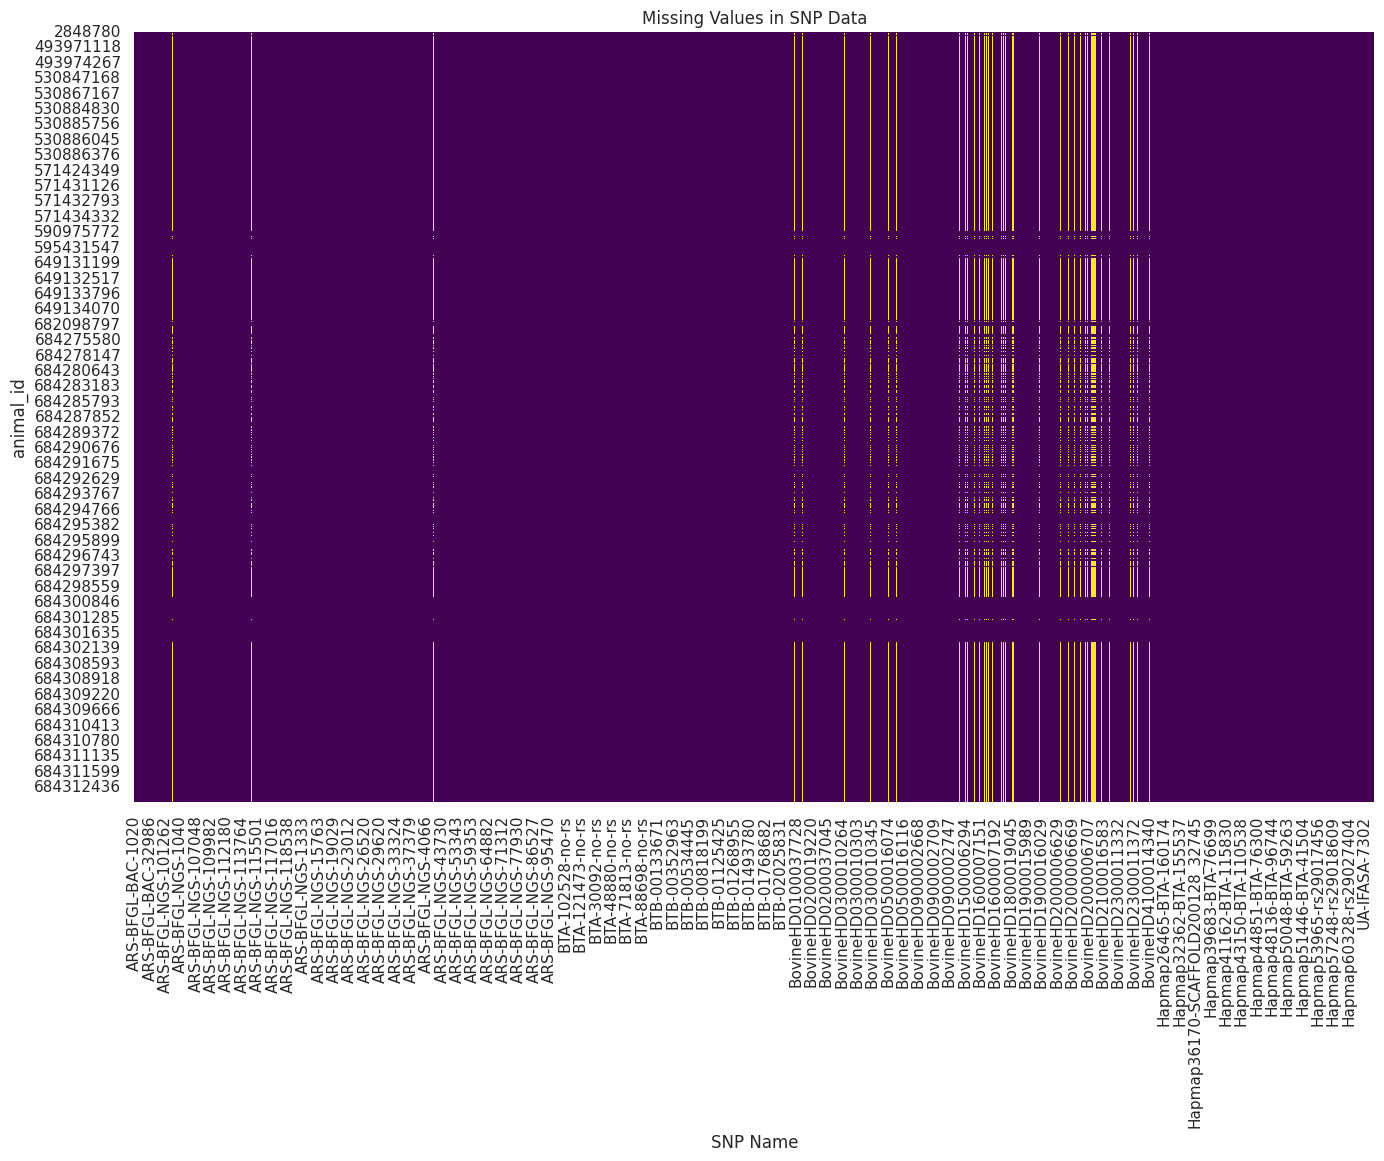

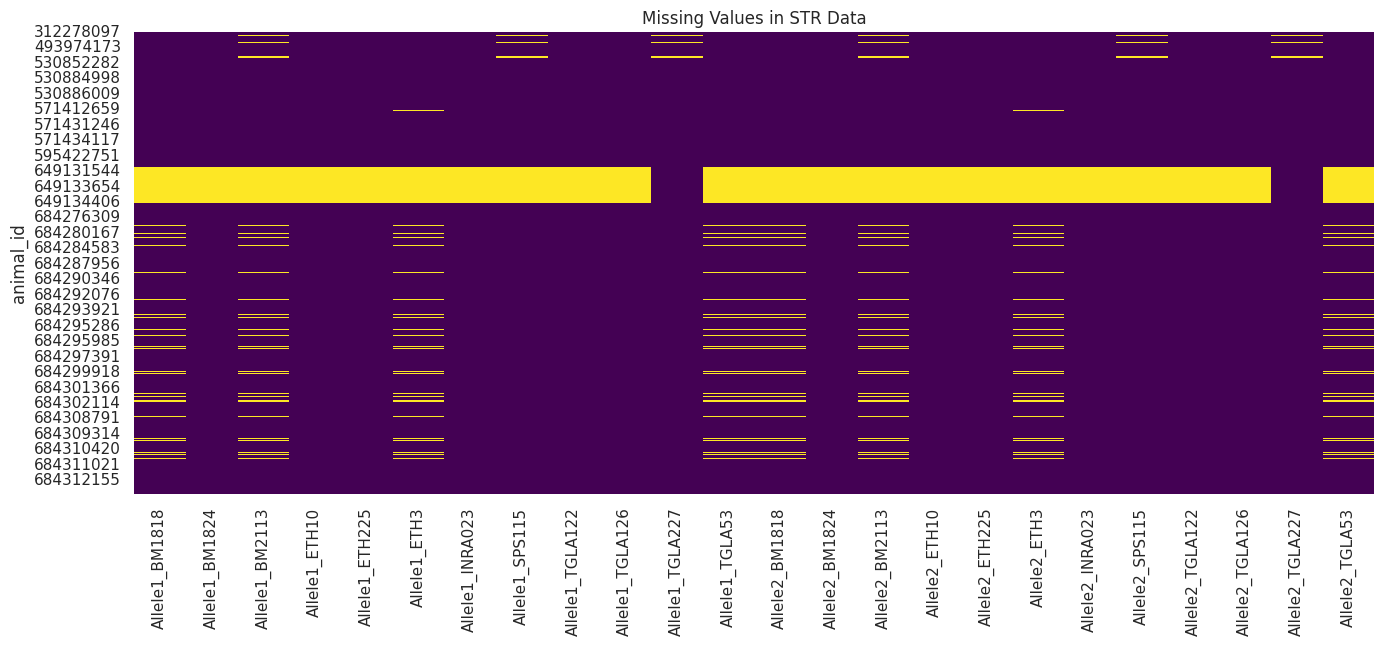

In [13]:
# Визуализация тепловой карты пропусков для SNP и STR данных
plt.figure(figsize=(16, 10))
sns.heatmap(snp_pivot.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in SNP Data')
plt.show()

plt.figure(figsize=(16, 6))
sns.heatmap(str_pivot.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in STR Data')
plt.show()

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

snp_data = pd.read_csv('../data/raw/FinalReport.csv', sep=';')
str_train = pd.read_csv('../data/raw/STR_train.csv', sep=';')



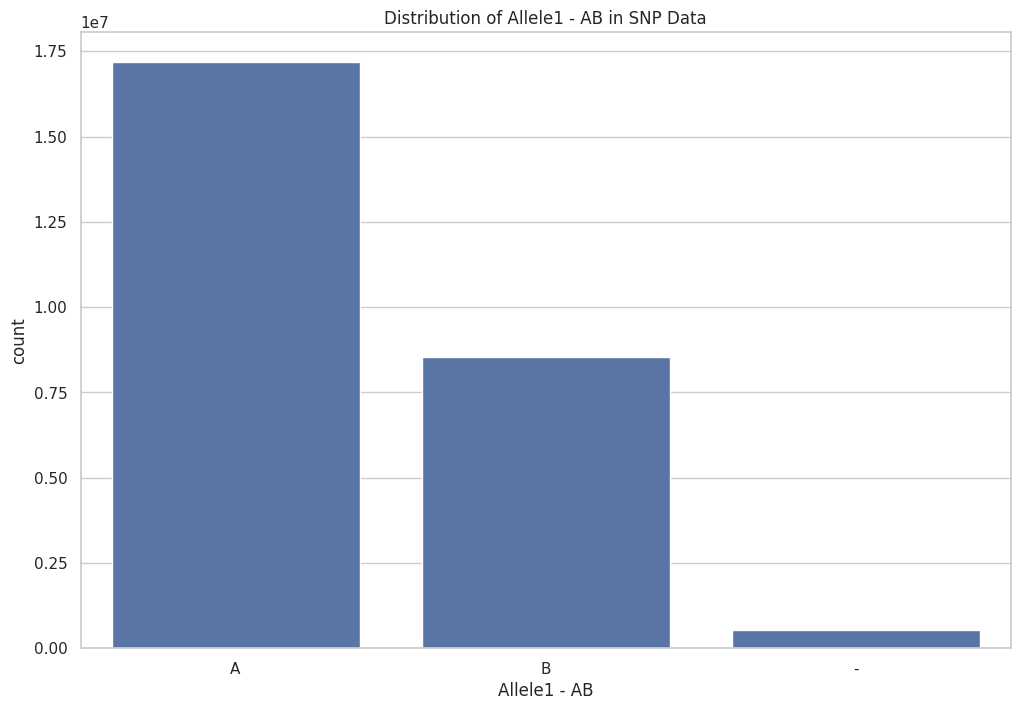

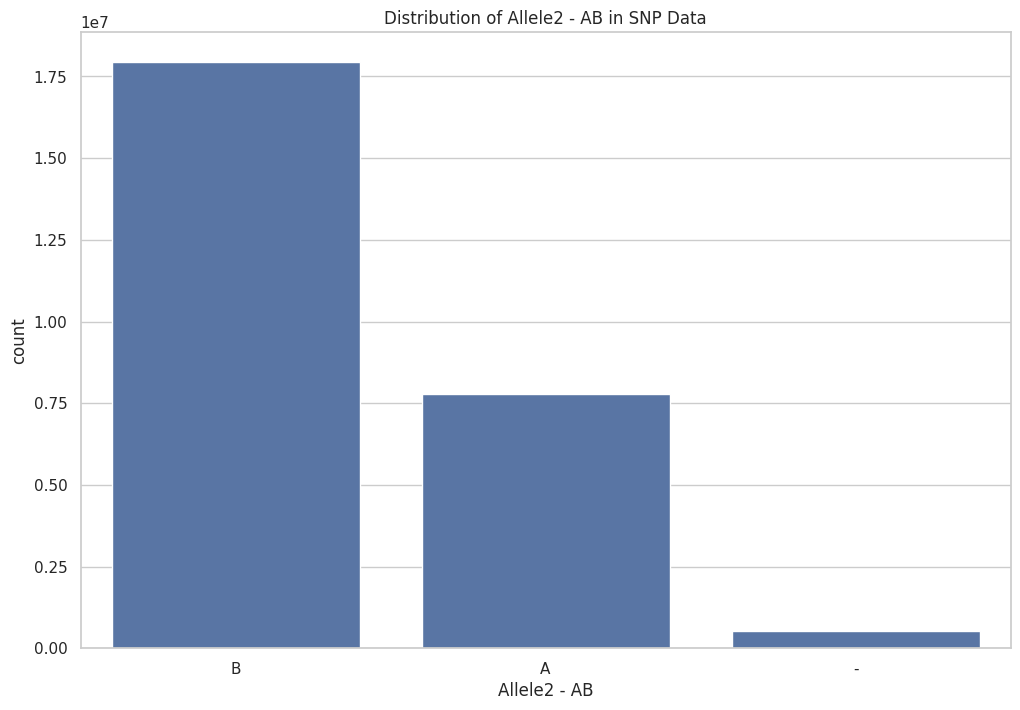

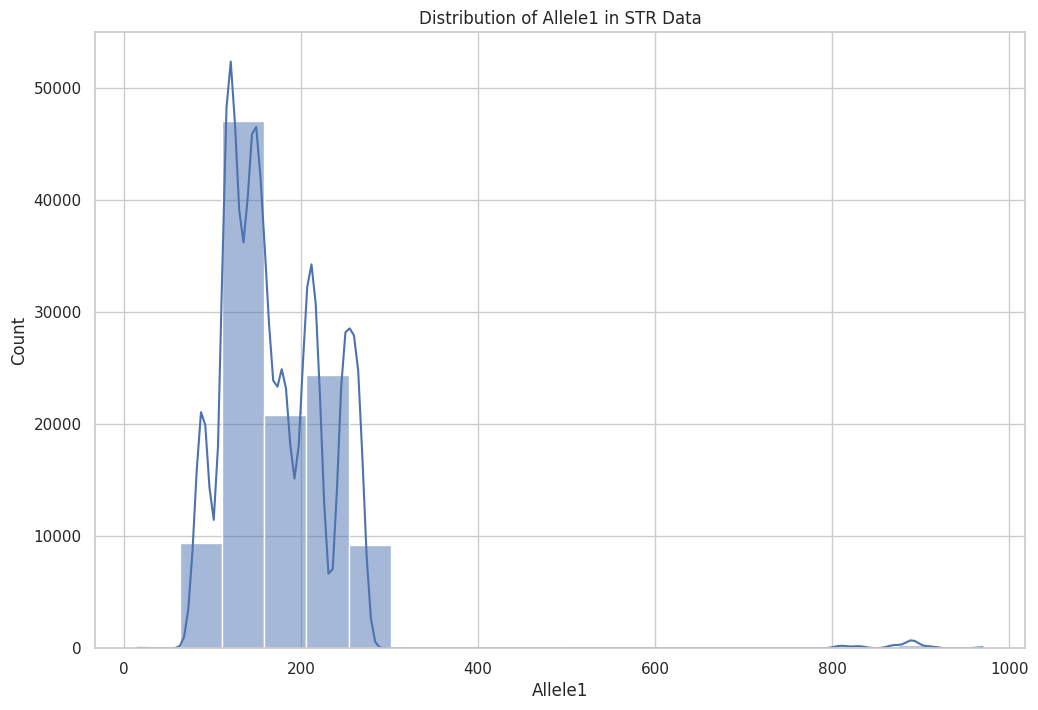

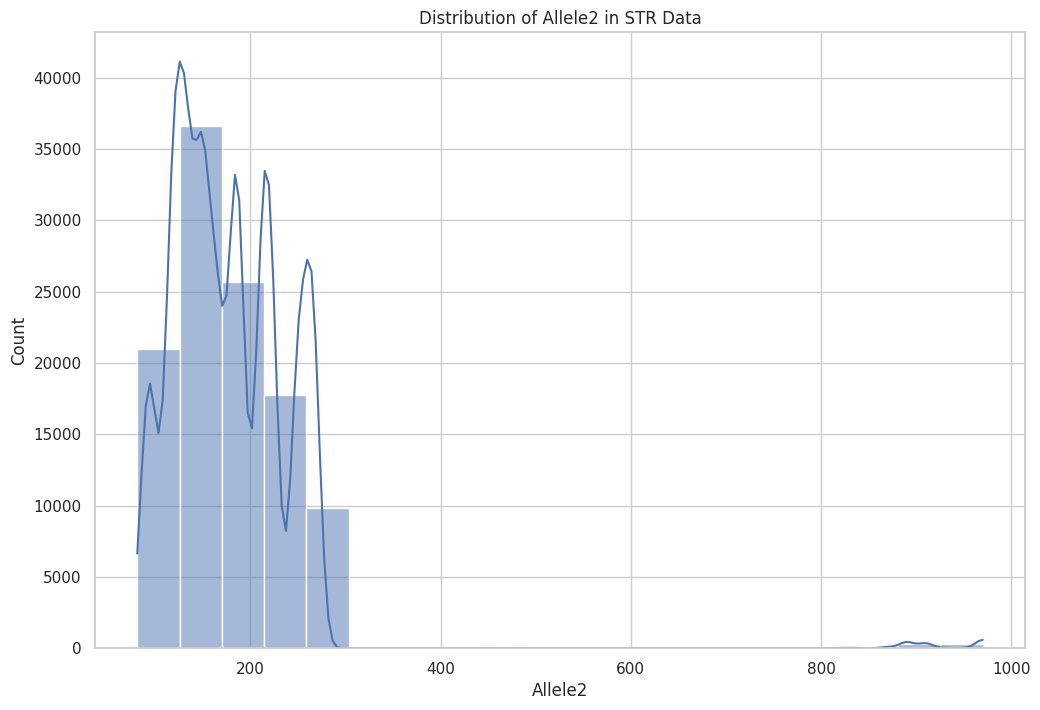

In [16]:
# 1. Анализ распределений значений SNP и STR

def plot_snp_distribution(snp_data):
    sns.countplot(x='Allele1 - AB', data=snp_data)
    plt.title('Distribution of Allele1 - AB in SNP Data')
    plt.show()

    sns.countplot(x='Allele2 - AB', data=snp_data)
    plt.title('Distribution of Allele2 - AB in SNP Data')
    plt.show()

def plot_str_distribution(str_train):
    for col in ['Allele1', 'Allele2']:
        sns.histplot(str_train[col].dropna(), bins=20, kde=True)
        plt.title(f'Distribution of {col} in STR Data')
        plt.show()

plot_snp_distribution(snp_data)
plot_str_distribution(str_train)

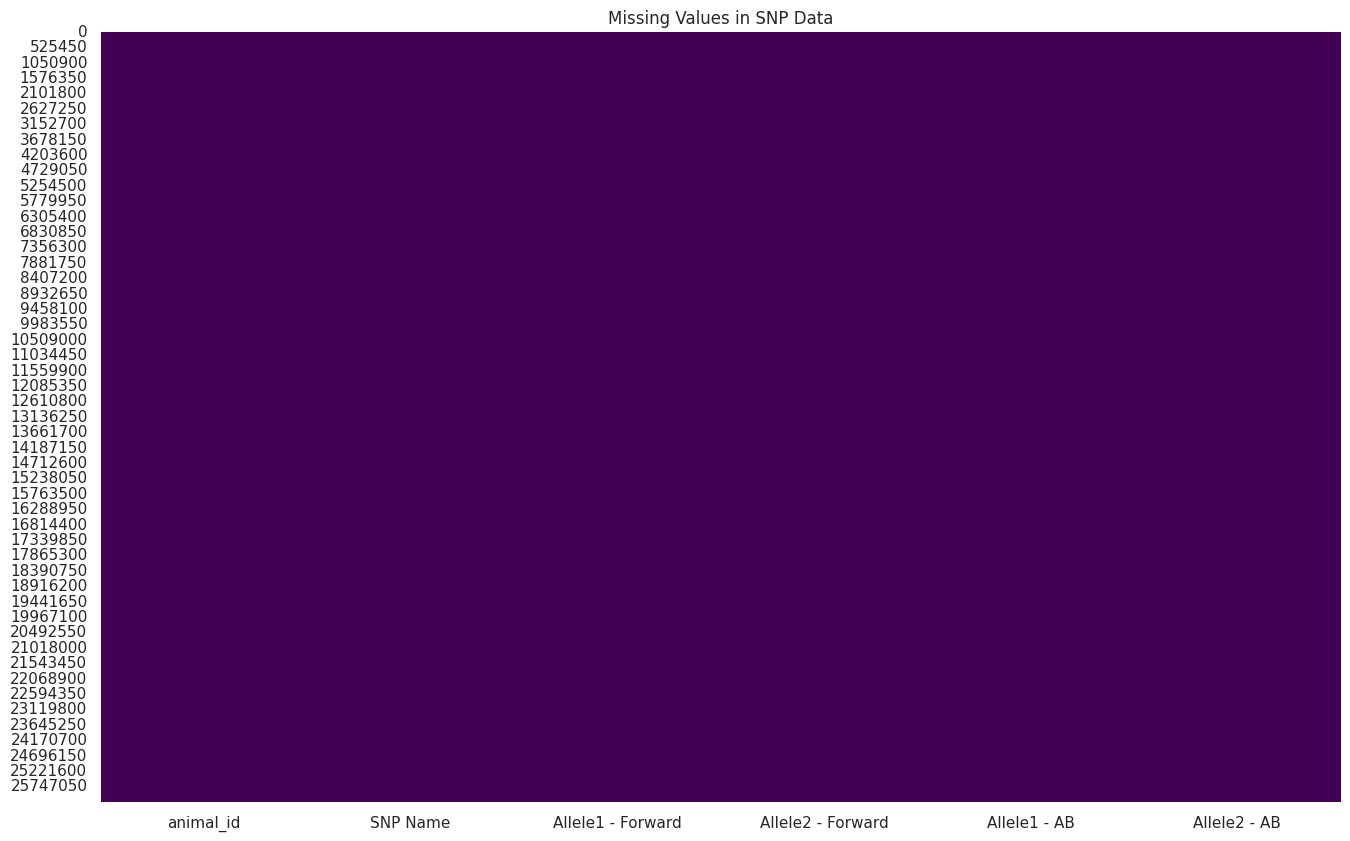

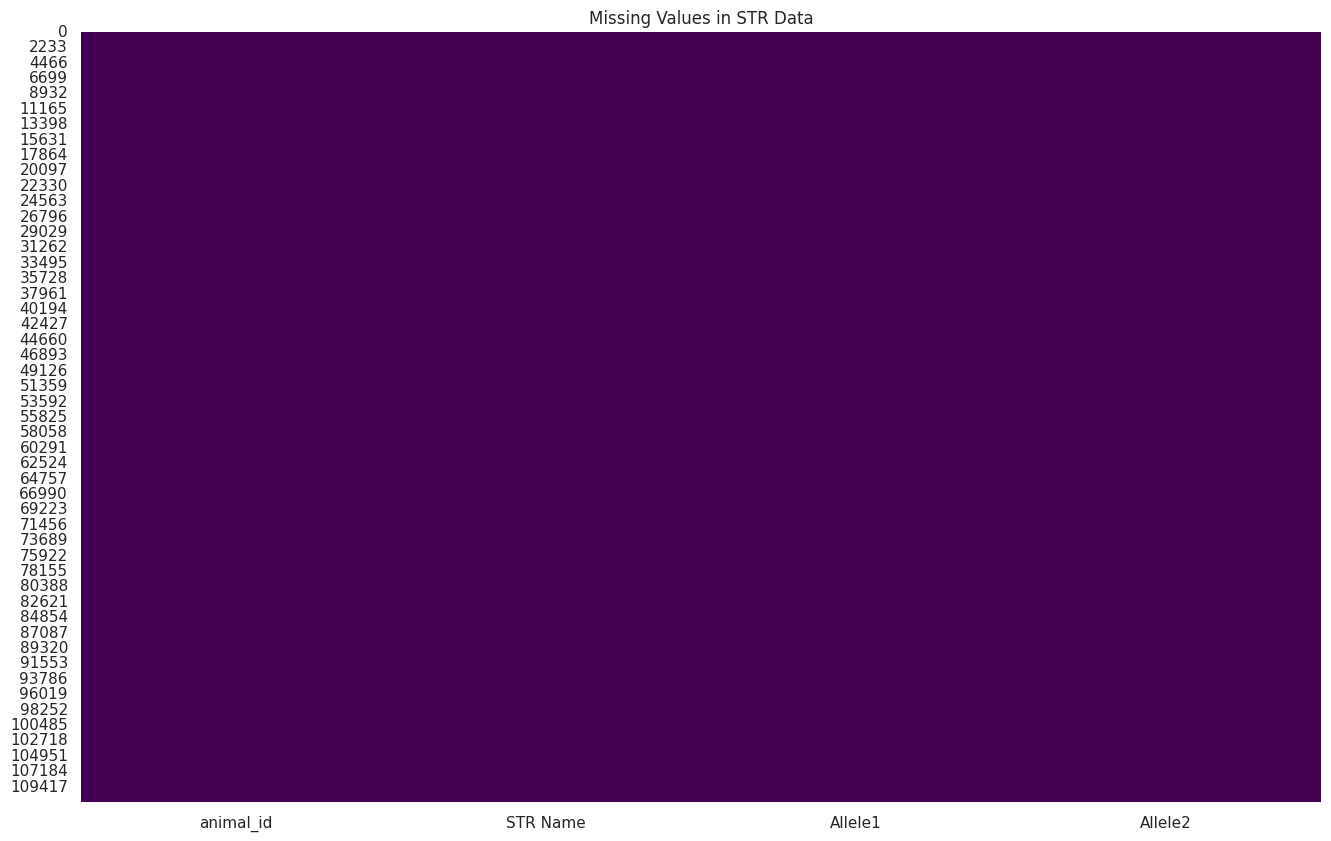

In [17]:
# 2. Пропуски в данных
def plot_missing_data(df, title):
    plt.figure(figsize=(16, 10))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(title)
    plt.show()

plot_missing_data(snp_data, 'Missing Values in SNP Data')
plot_missing_data(str_train, 'Missing Values in STR Data')


In [18]:
# 3. Корреляция между SNP и STR

def preprocess_snp(df):
    df = df.pivot_table(index='animal_id', columns='SNP Name', values='Allele1 - AB', aggfunc='first')
    df = df.replace('-', np.nan)
    allele_mapping = {'A': 0, 'B': 1}
    df = df.replace(allele_mapping)
    df = df.fillna(df.mean())
    return df

def preprocess_str(df):
    df = df.pivot_table(index='animal_id', columns='STR Name', values=['Allele1', 'Allele2'], aggfunc='first')
    df.columns = ['_'.join(col).strip() for col in df.columns.values]
    return df

snp_pivot = preprocess_snp(snp_data)
str_pivot = preprocess_str(str_train)

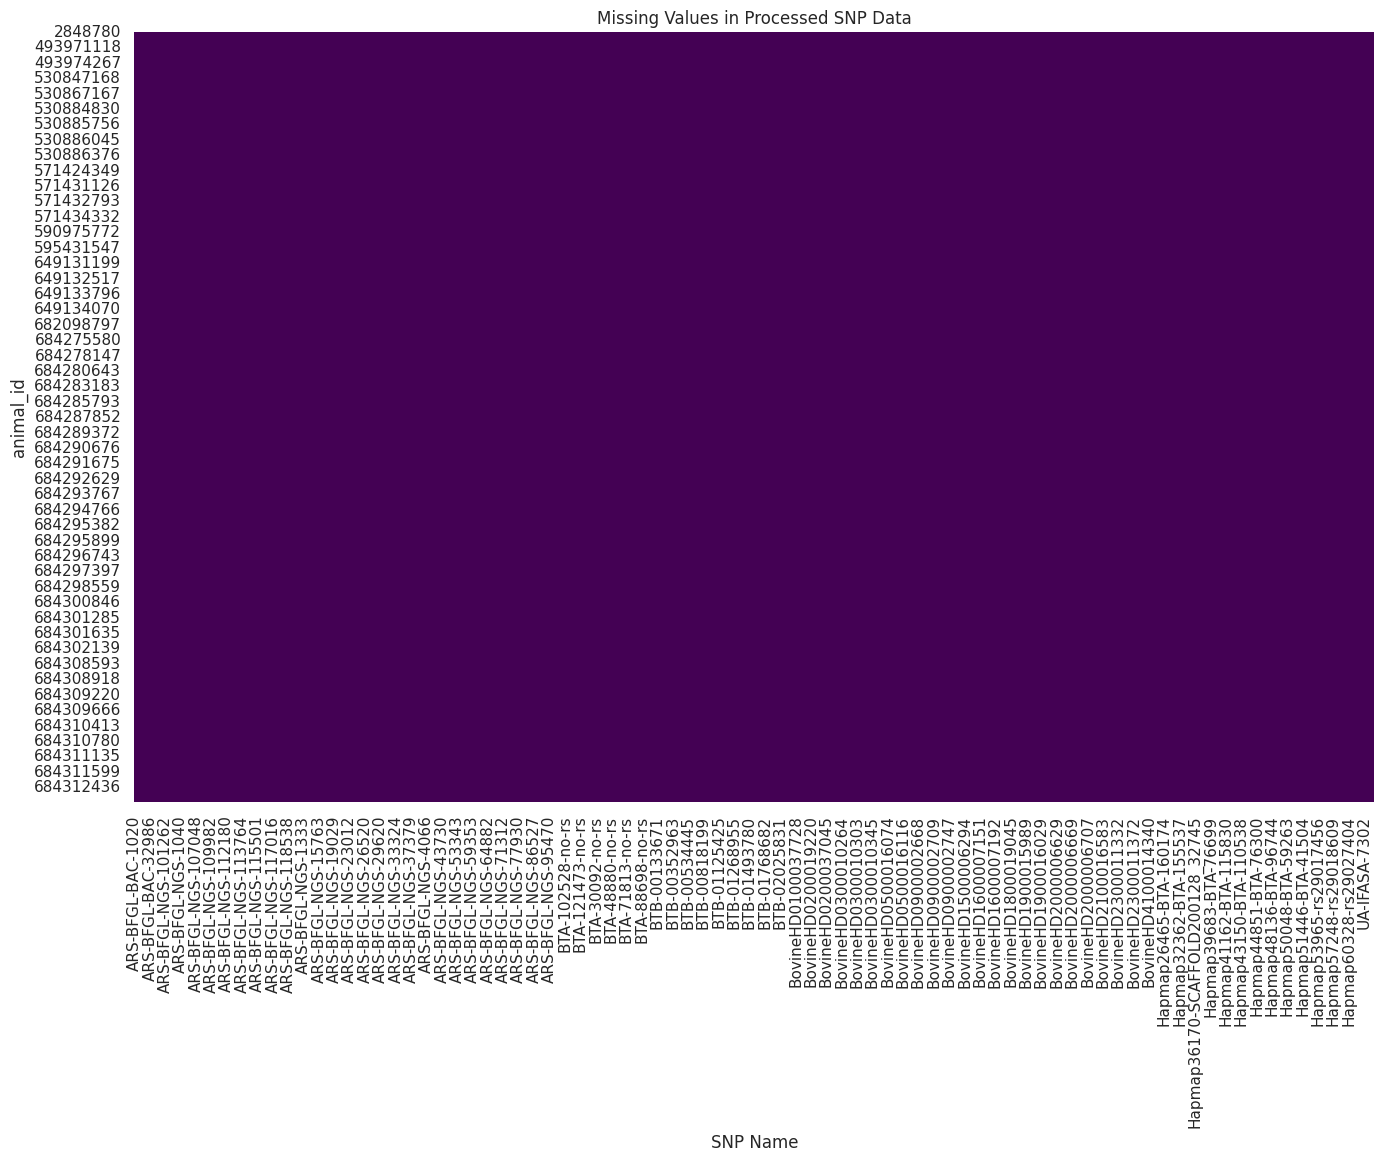

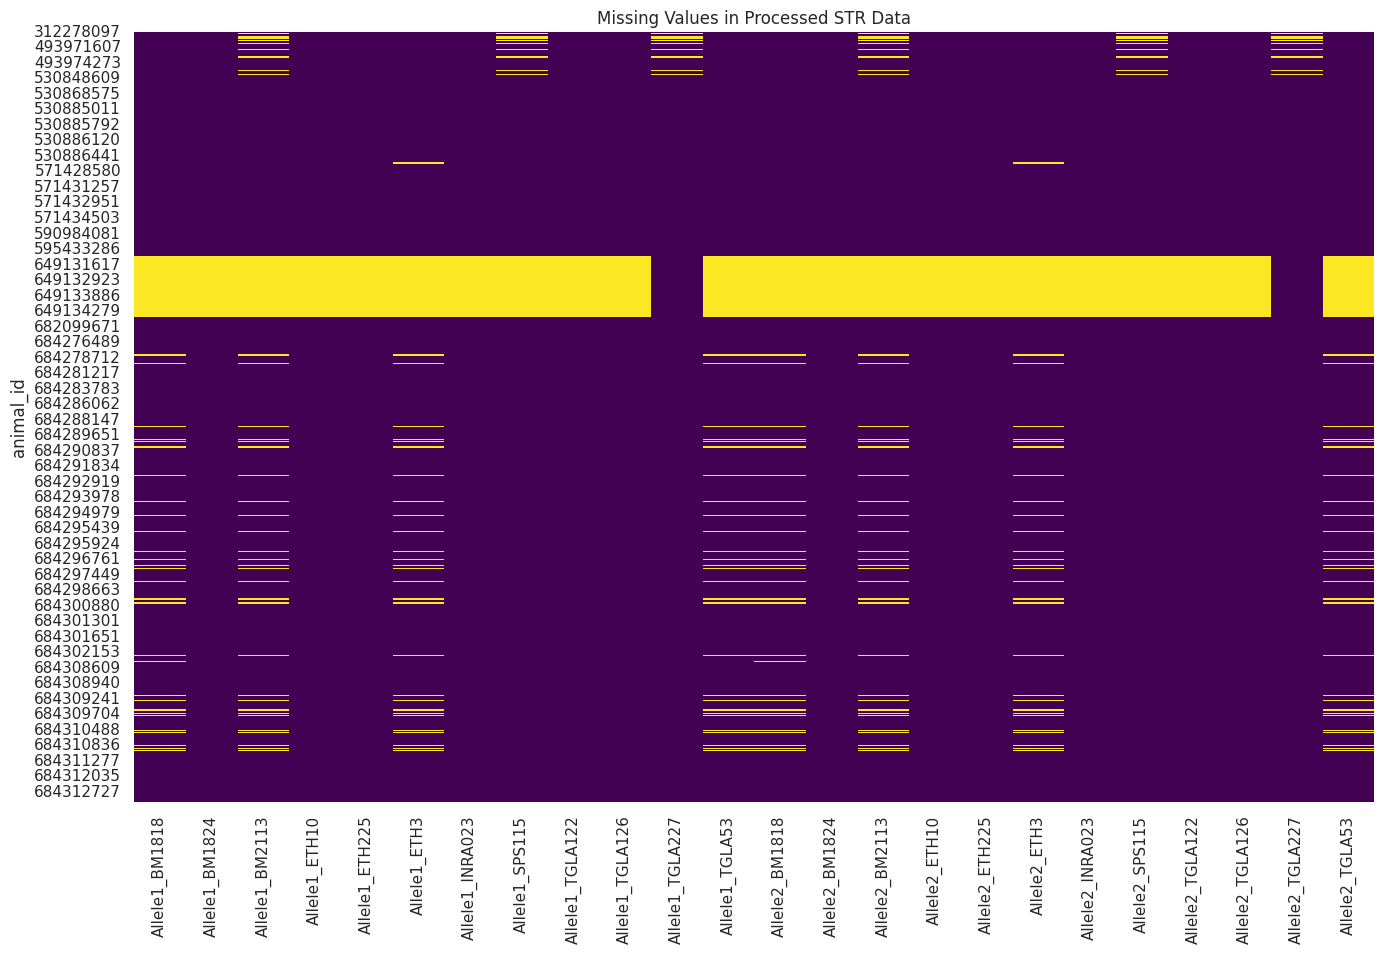

In [19]:
# Пропуски в SNP и STR данных (визуализация)
plot_missing_data(snp_pivot, 'Missing Values in Processed SNP Data')
plot_missing_data(str_pivot, 'Missing Values in Processed STR Data')


In [20]:
# Вычисление корреляции между SNP и STR
combined_data = snp_pivot.merge(str_pivot, left_index=True, right_index=True, how='inner')
corr_matrix = combined_data.corr()

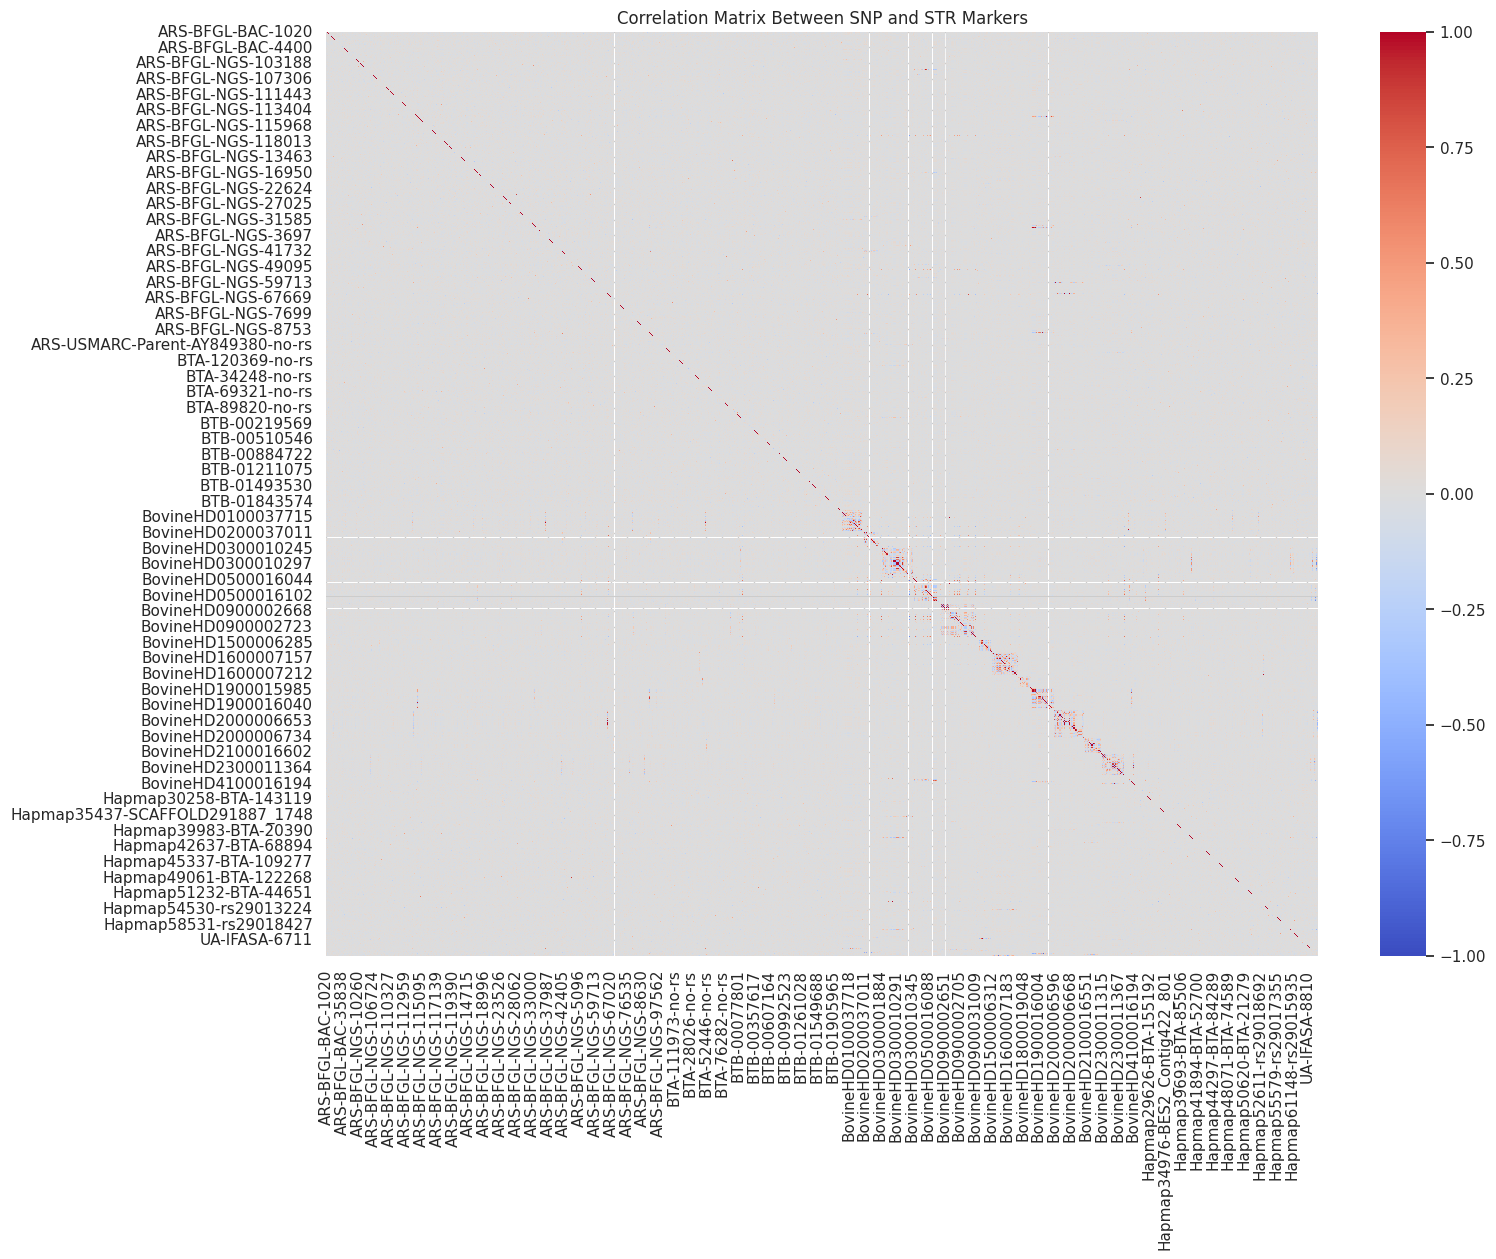

In [21]:
# Визуализация корреляционной матрицы
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Between SNP and STR Markers')
plt.show()

In [22]:
# 4. Поиск выбросов в STR данных

def detect_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers = {}
for col in str_pivot.columns:
    outliers[col] = detect_outliers(str_pivot, col)
    print(f"Outliers in {col}: {len(outliers[col])}")


Outliers in Allele1_BM1818: 4
Outliers in Allele1_BM1824: 5
Outliers in Allele1_BM2113: 4
Outliers in Allele1_ETH10: 2
Outliers in Allele1_ETH225: 4
Outliers in Allele1_ETH3: 3
Outliers in Allele1_INRA023: 3
Outliers in Allele1_SPS115: 605
Outliers in Allele1_TGLA122: 254
Outliers in Allele1_TGLA126: 46
Outliers in Allele1_TGLA227: 600
Outliers in Allele1_TGLA53: 399
Outliers in Allele2_BM1818: 1551
Outliers in Allele2_BM1824: 0
Outliers in Allele2_BM2113: 1144
Outliers in Allele2_ETH10: 63
Outliers in Allele2_ETH225: 138
Outliers in Allele2_ETH3: 1053
Outliers in Allele2_INRA023: 251
Outliers in Allele2_SPS115: 431
Outliers in Allele2_TGLA122: 3
Outliers in Allele2_TGLA126: 1830
Outliers in Allele2_TGLA227: 558
Outliers in Allele2_TGLA53: 1


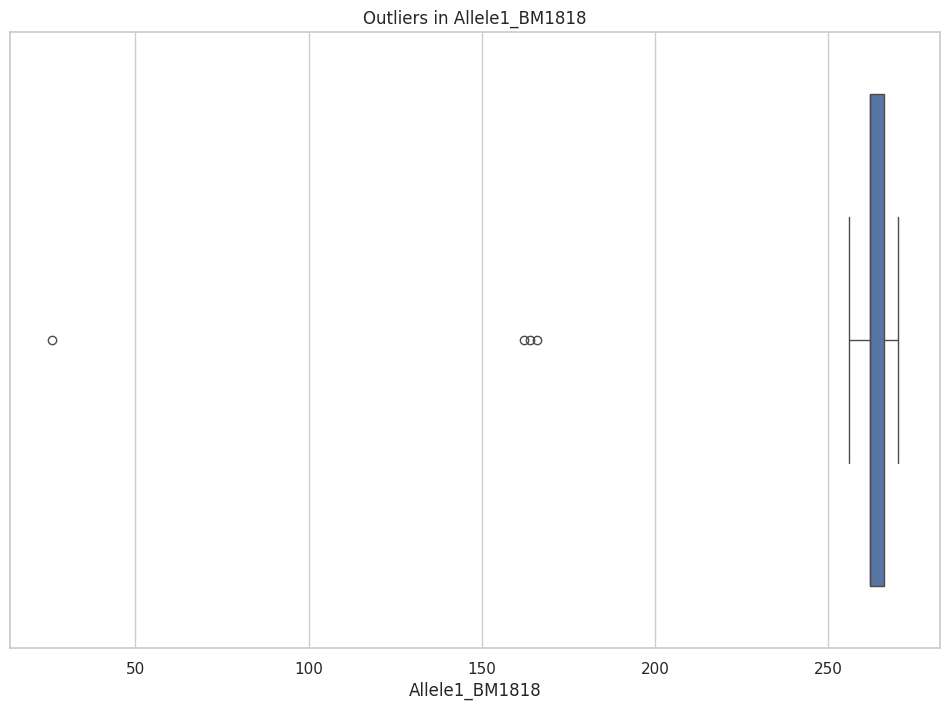

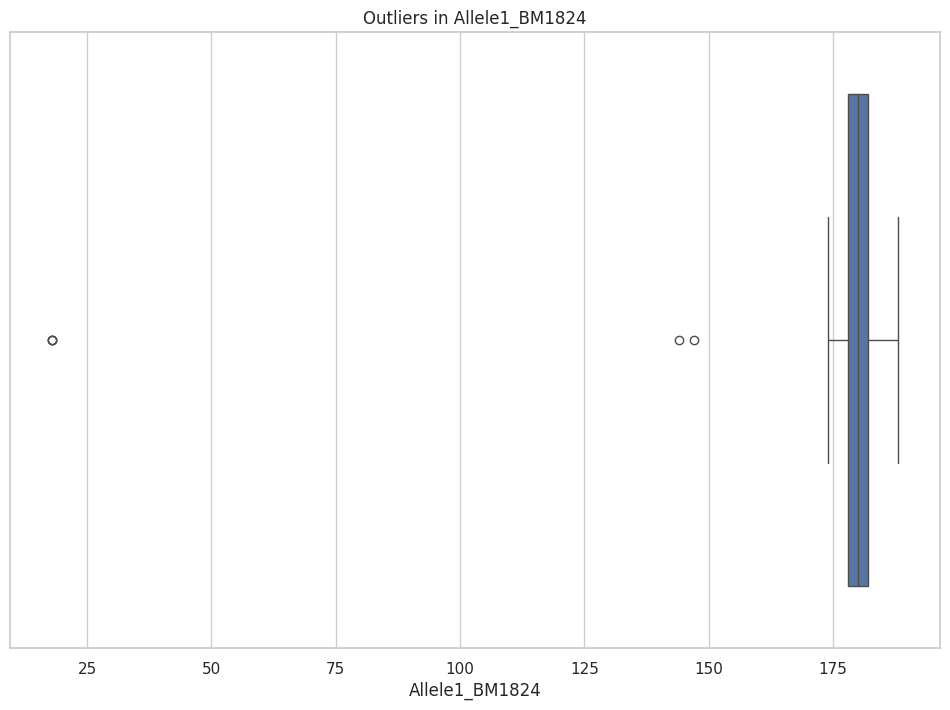

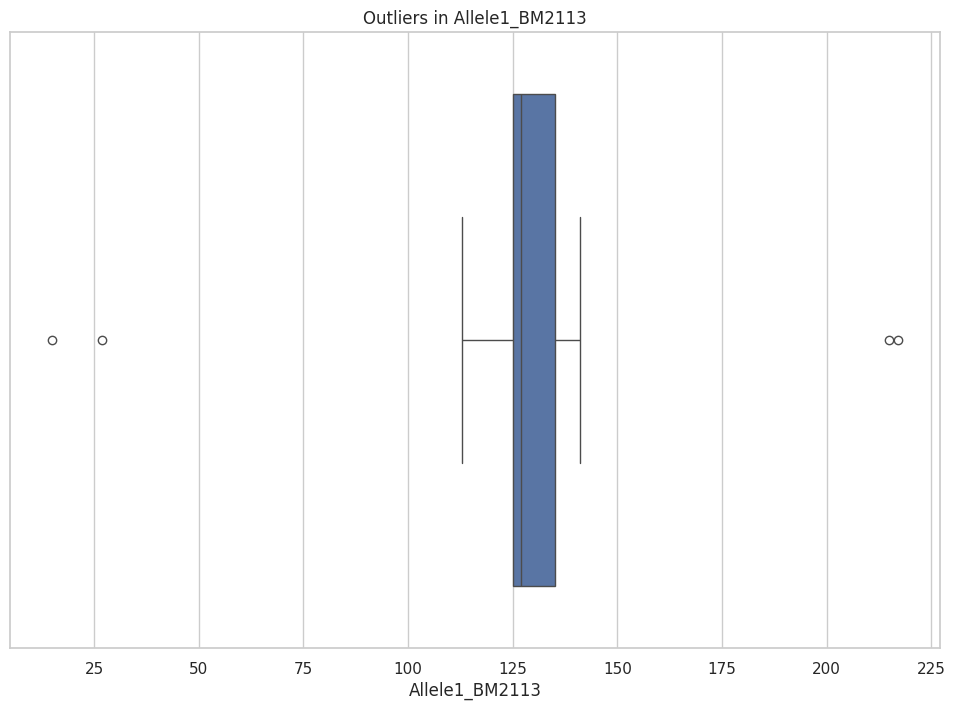

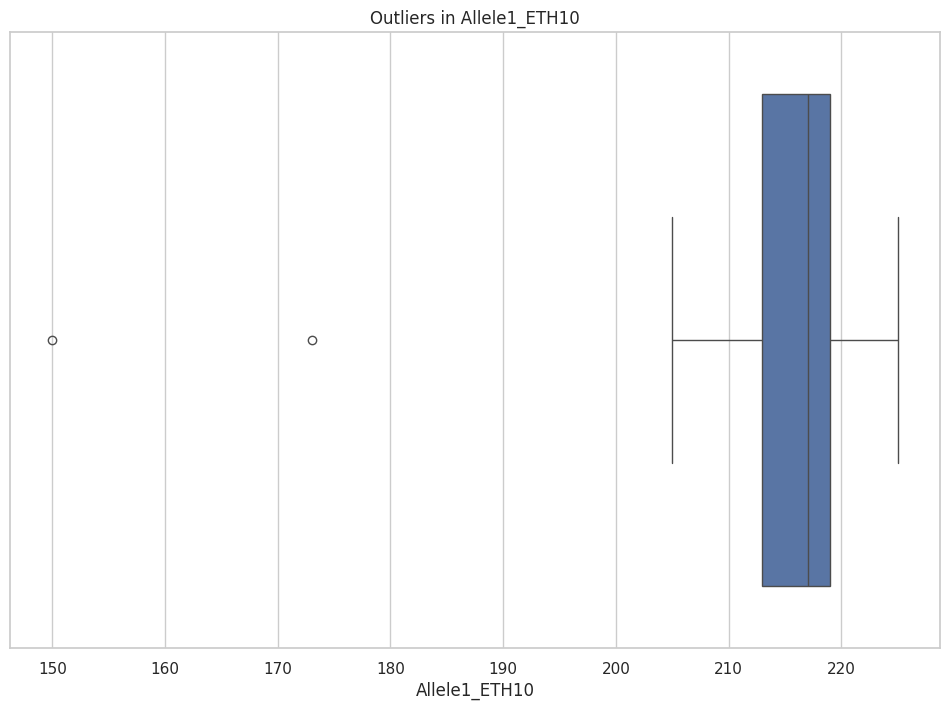

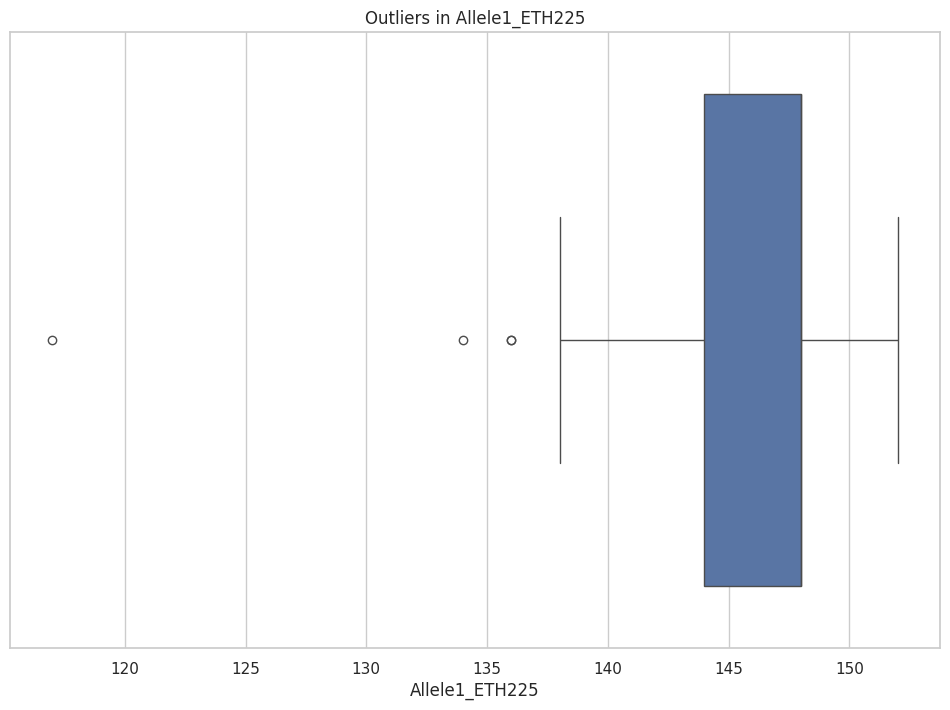

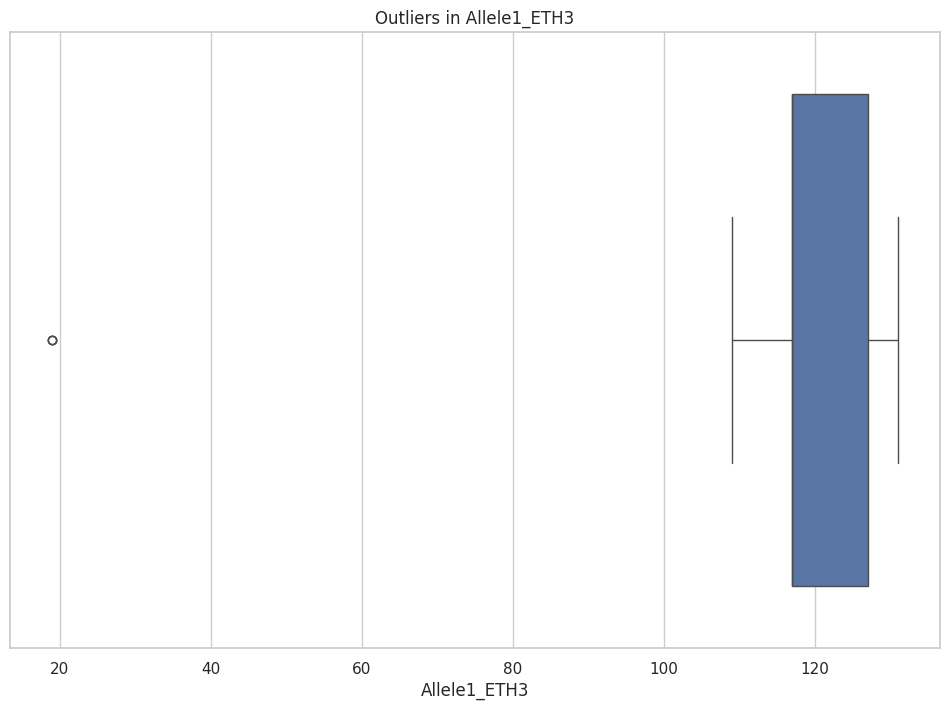

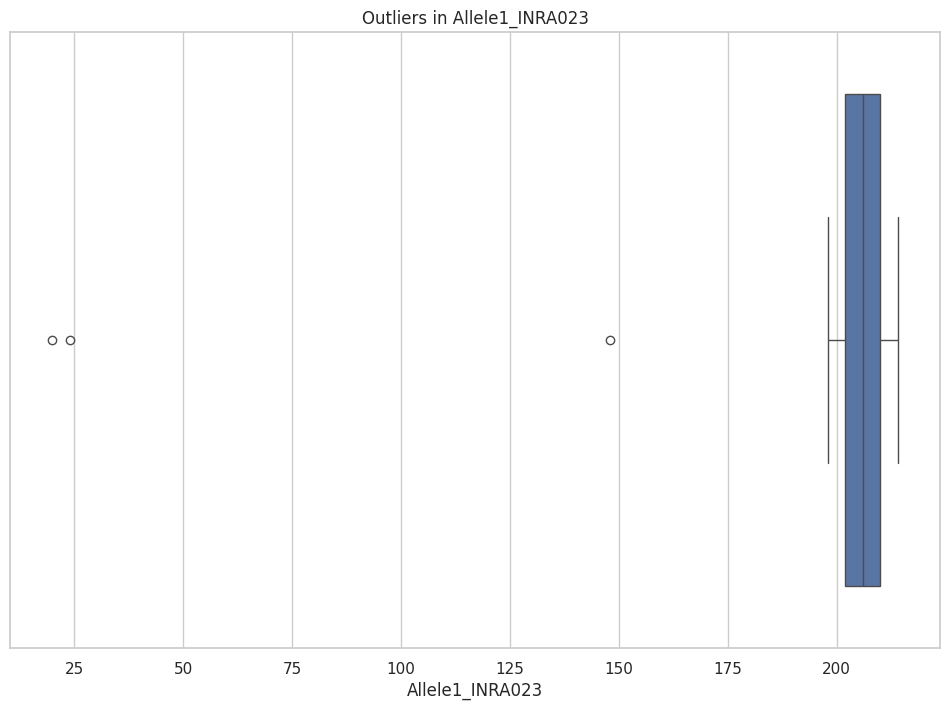

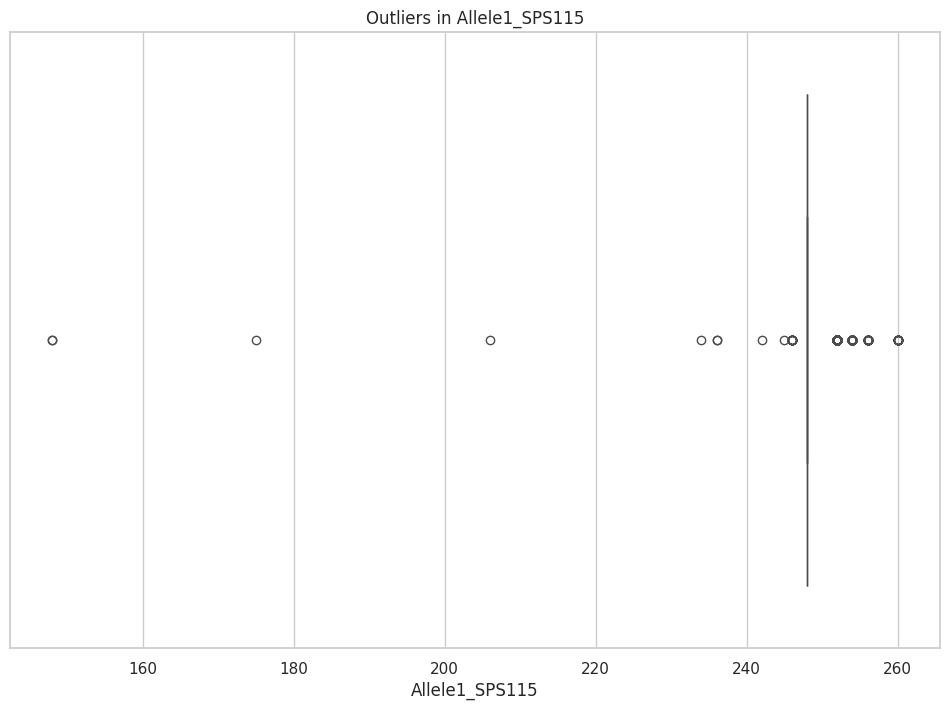

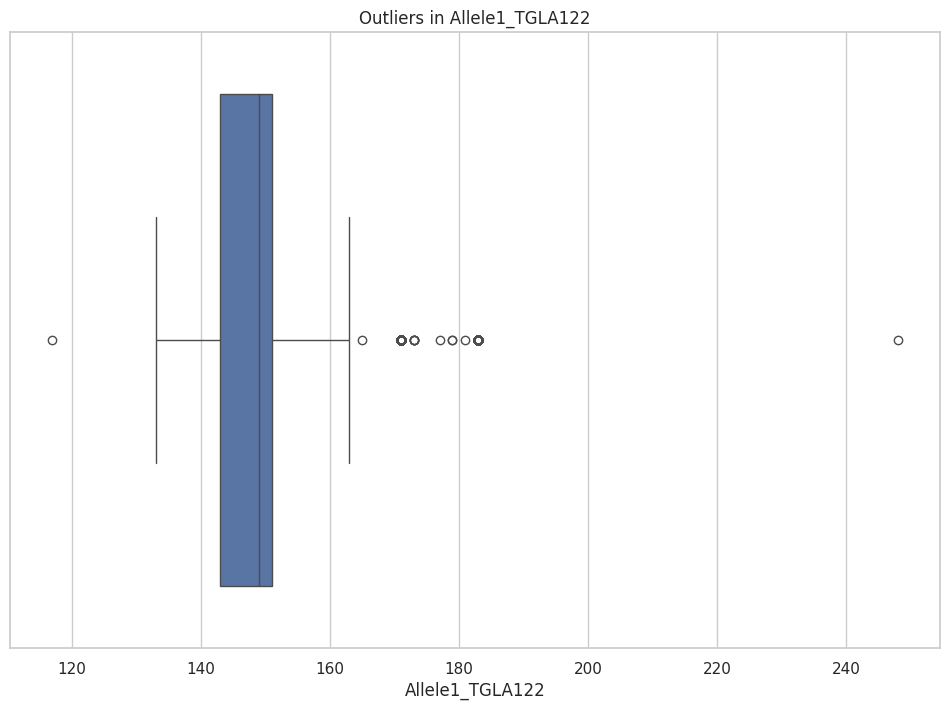

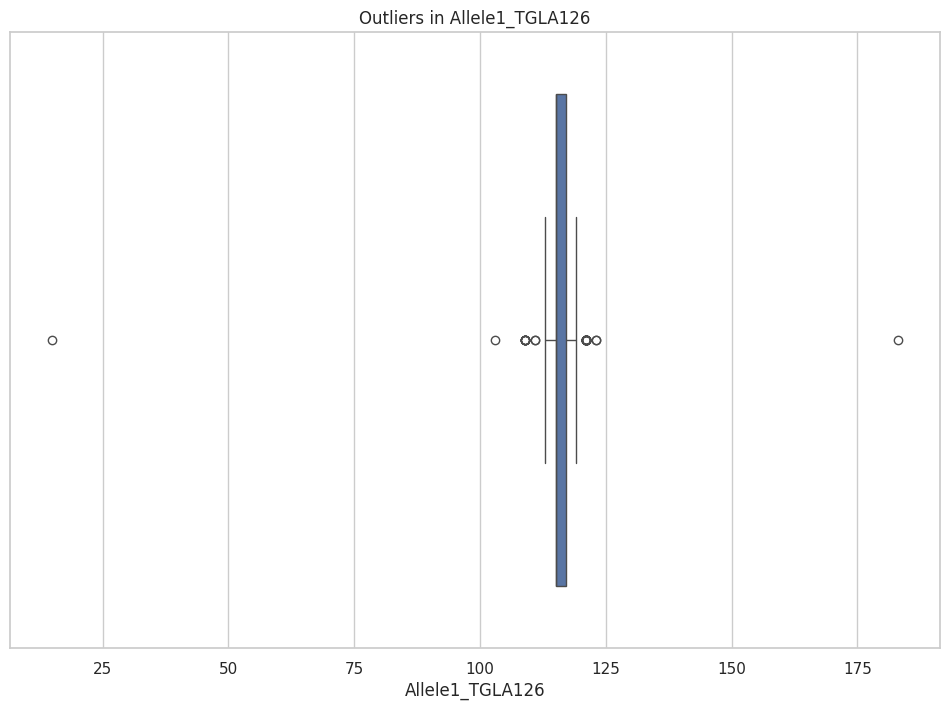

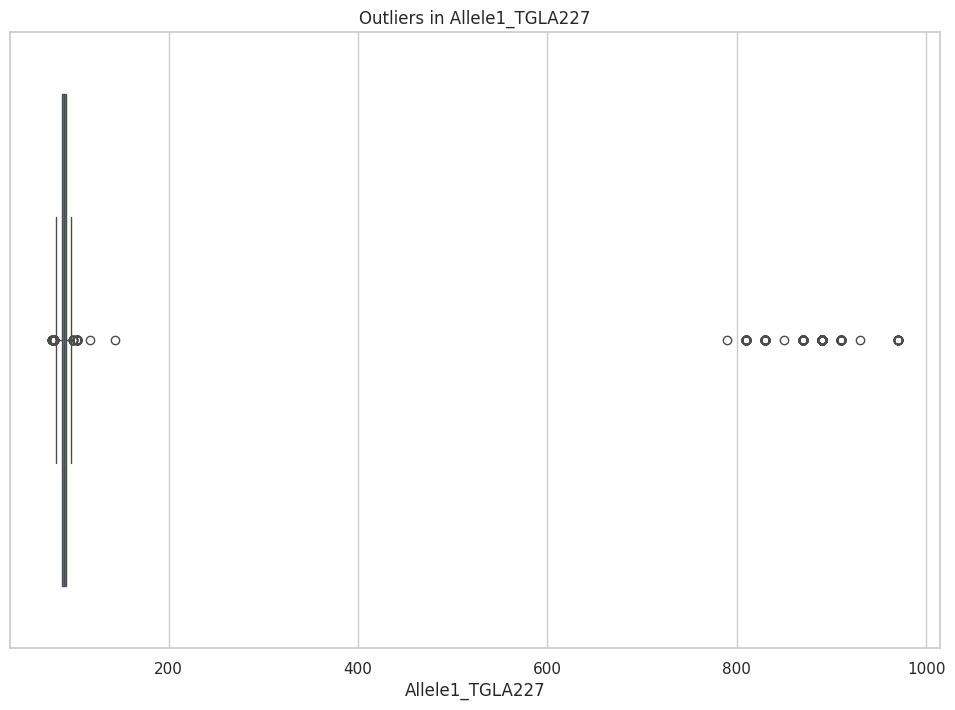

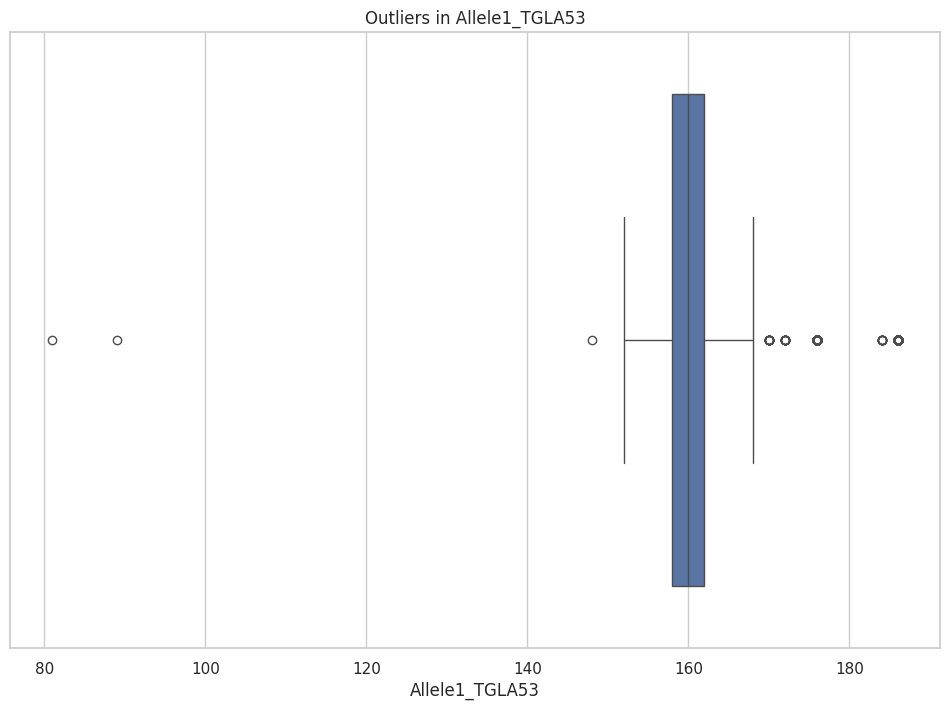

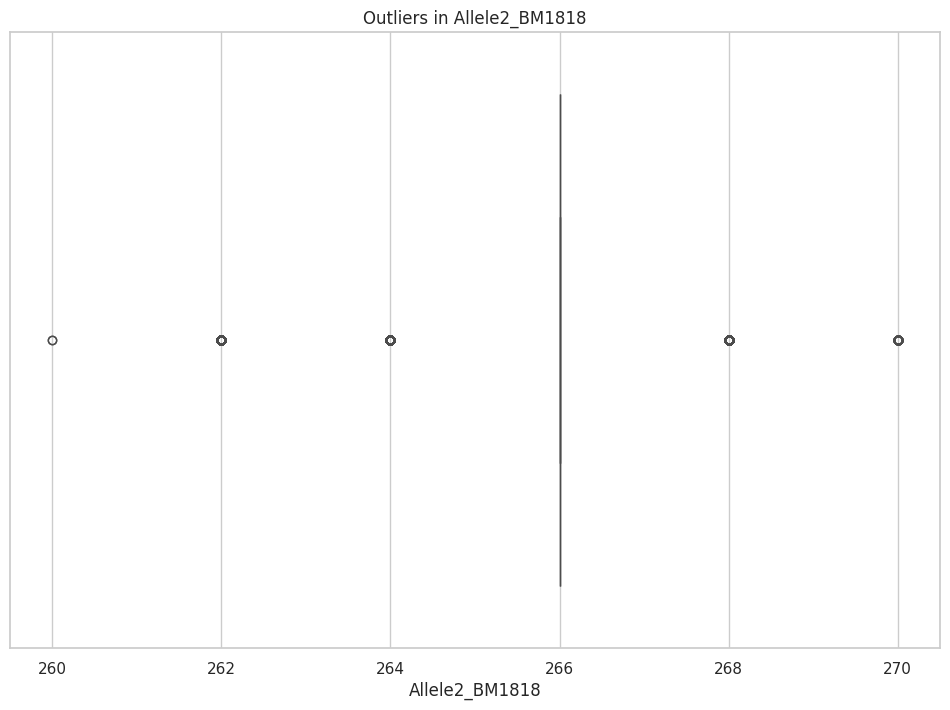

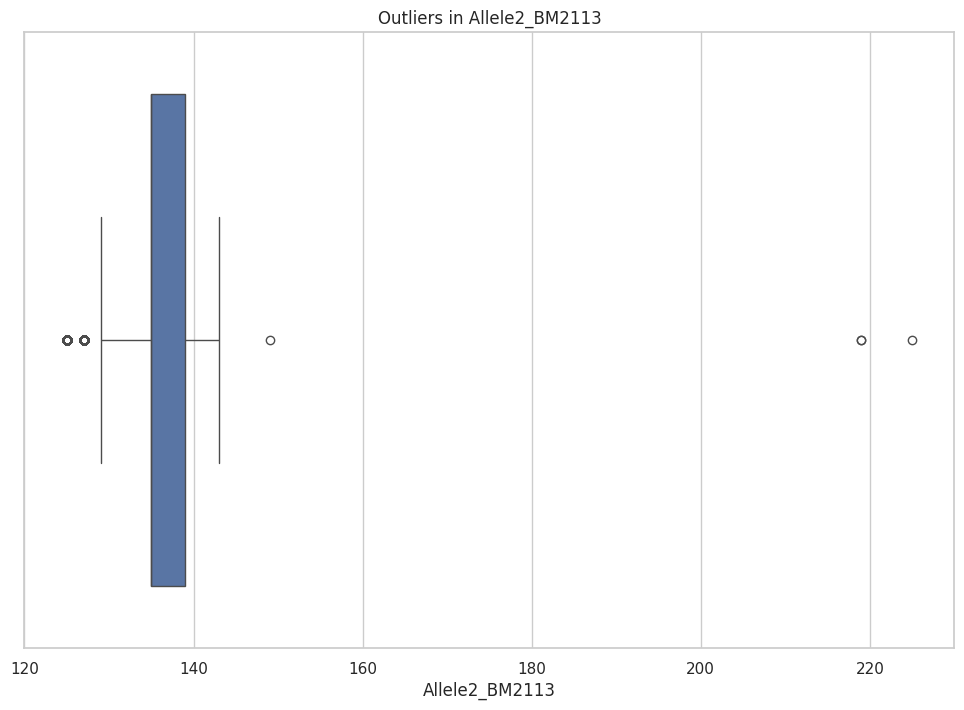

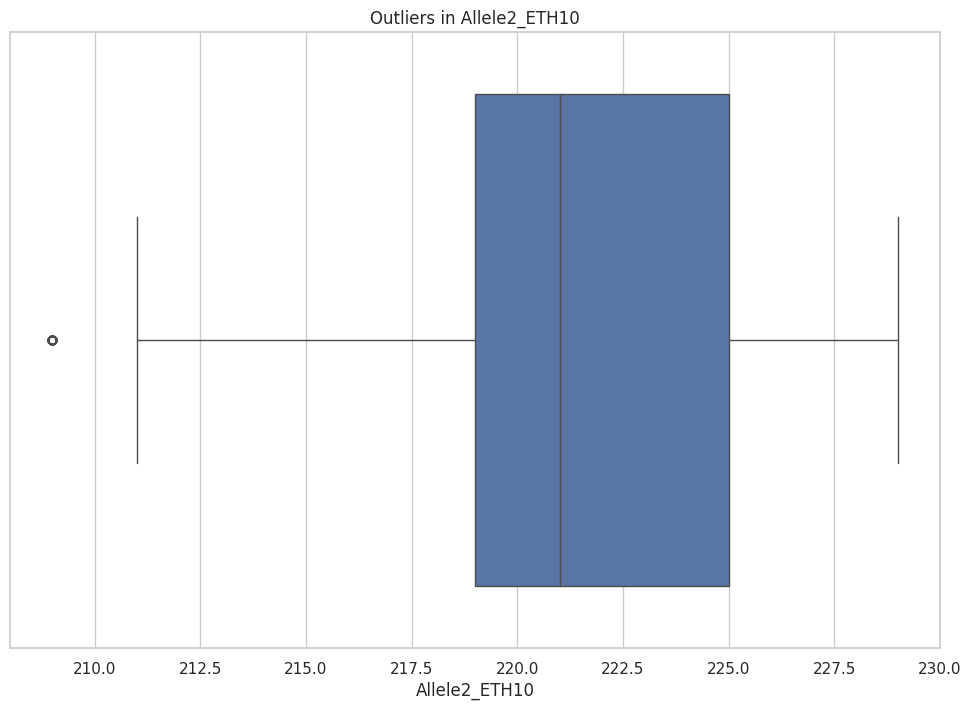

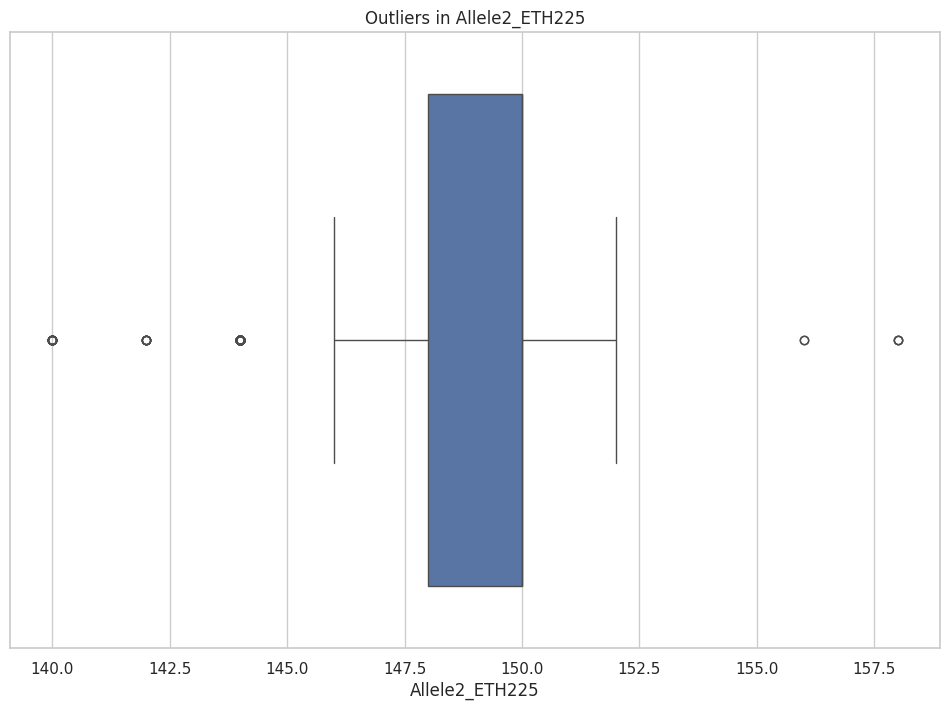

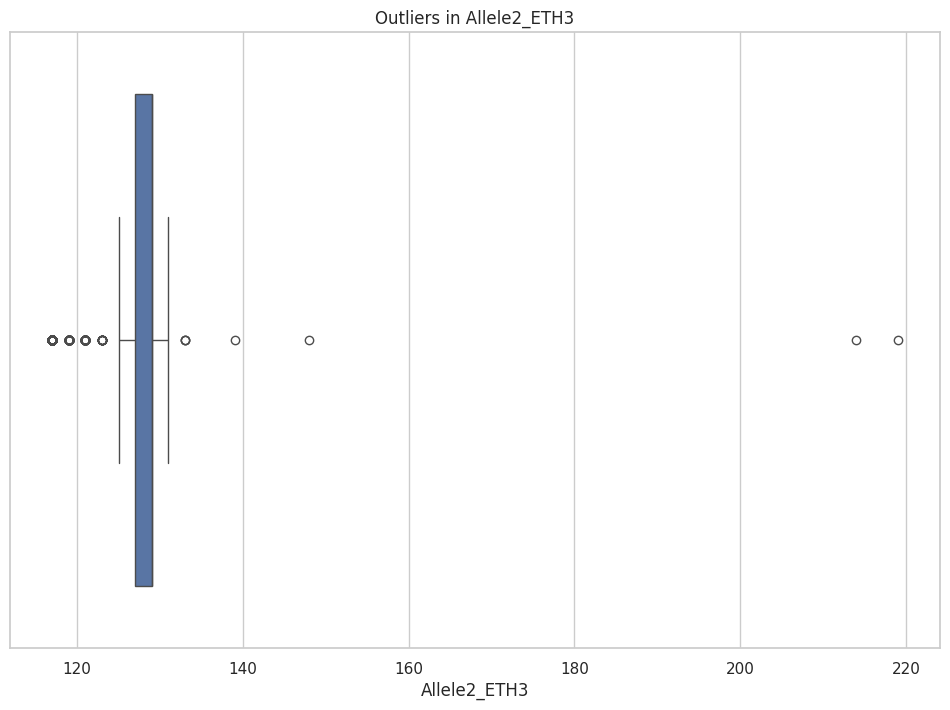

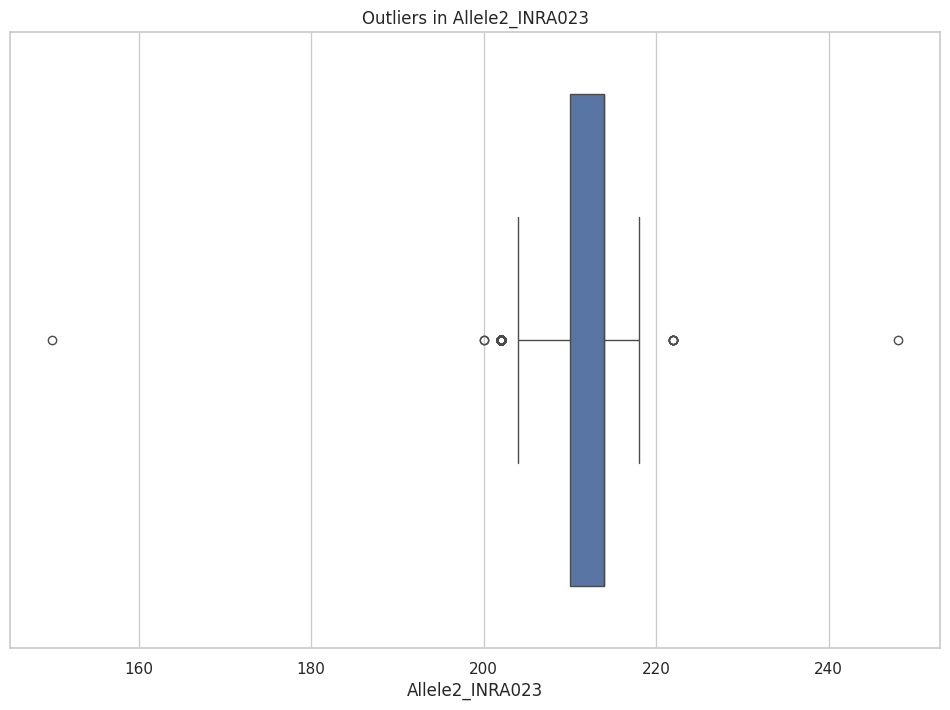

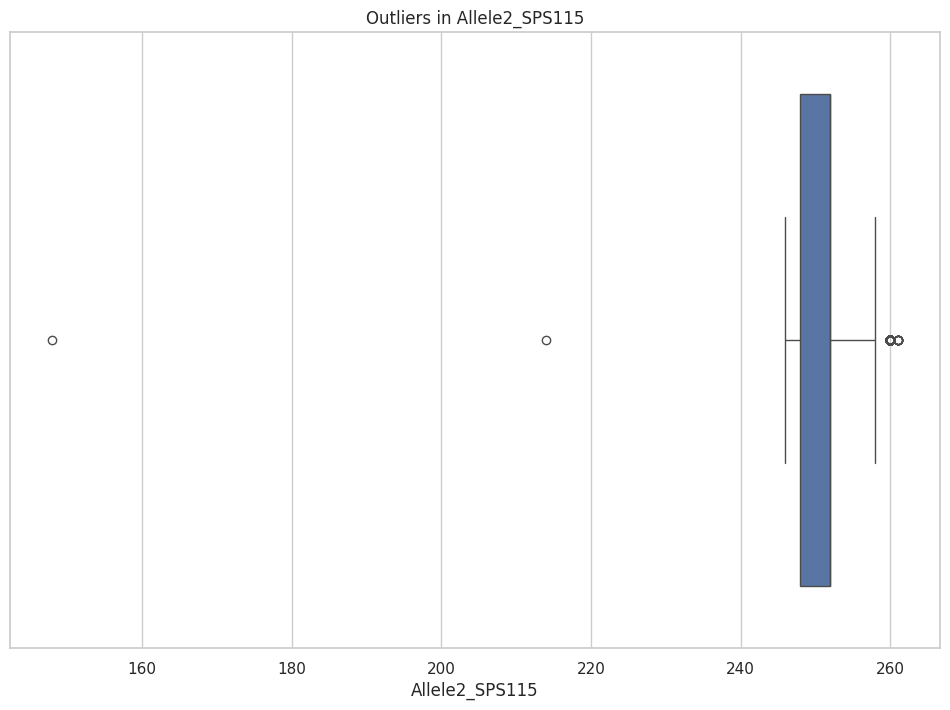

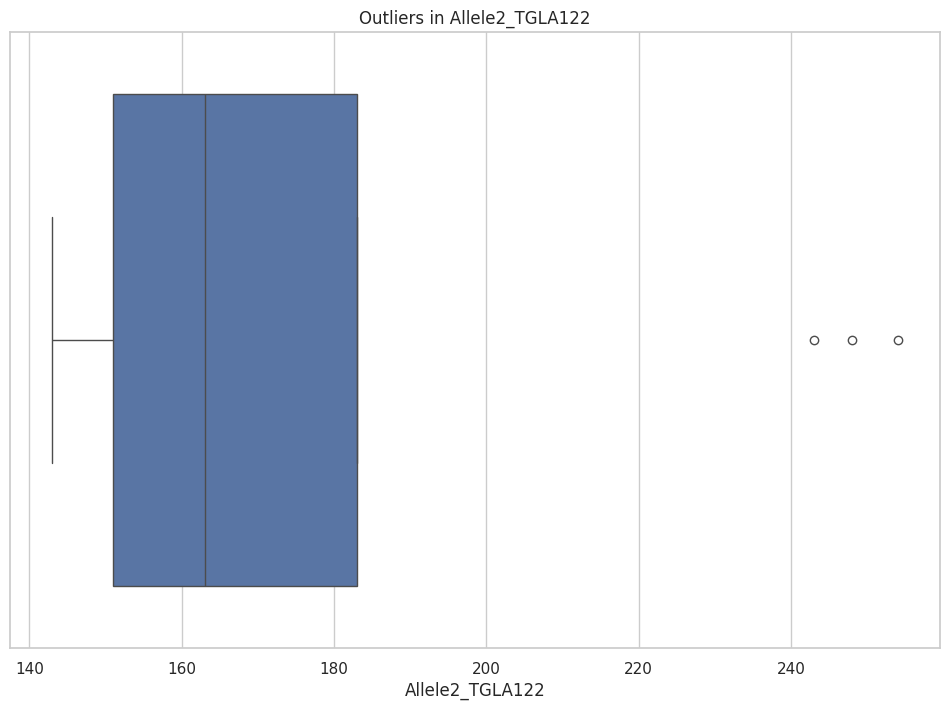

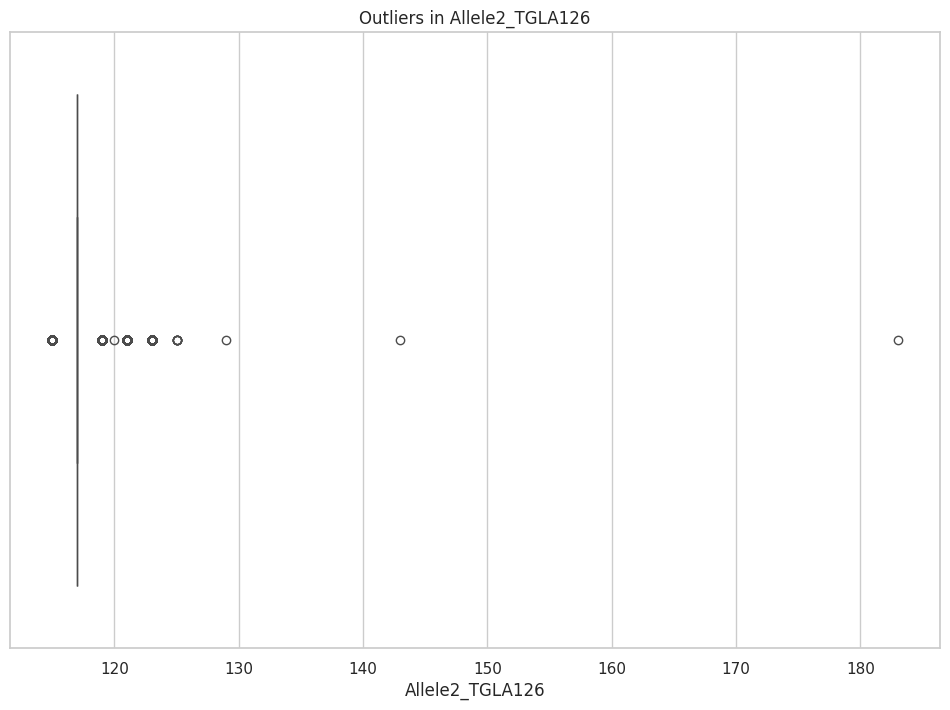

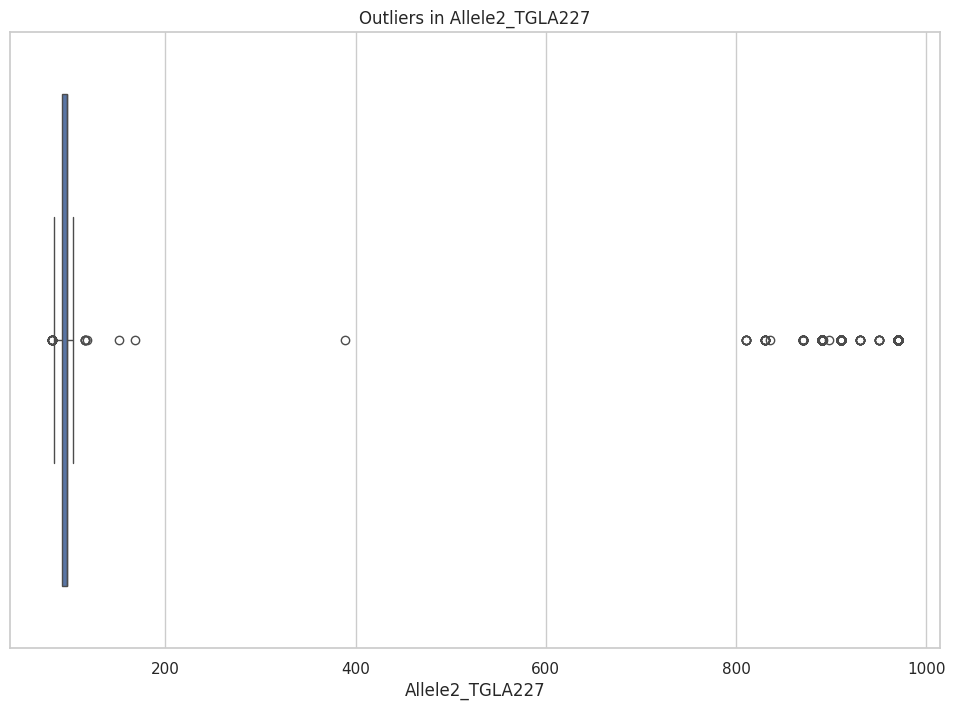

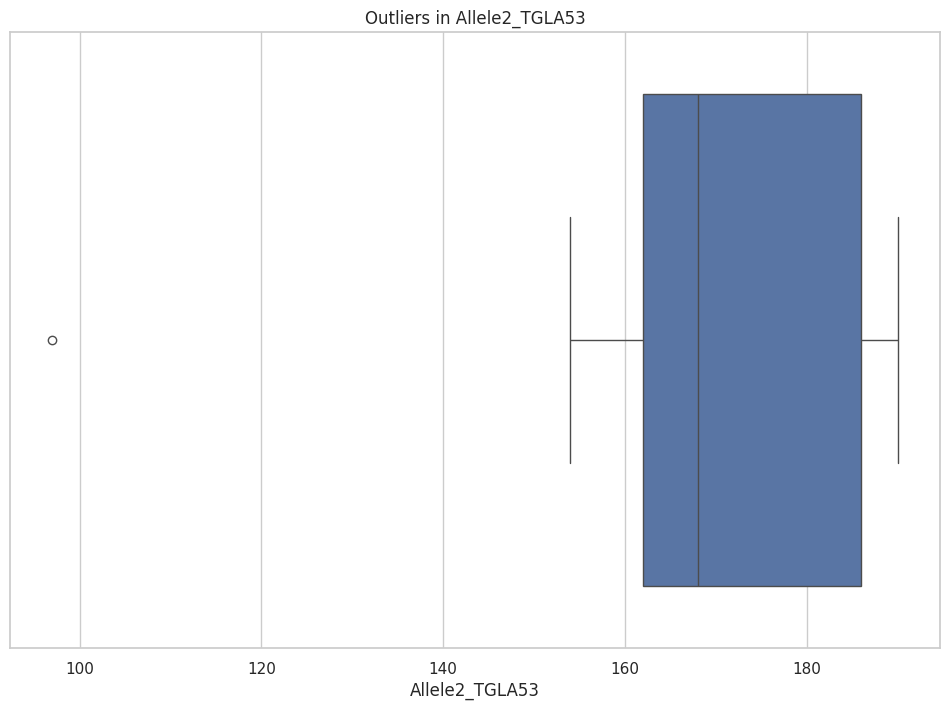

In [23]:
# Визуализация выбросов
for col, outliers_df in outliers.items():
    if len(outliers_df) > 0:
        sns.boxplot(x=str_pivot[col])
        plt.title(f'Outliers in {col}')
        plt.show()